# Seaborn의 주요 차트 

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# scatter 

상관관계 시각화 - 분포, 경향성, 이상치 탐색
- 회귀분석, 군집분석 등에서 탐색적데이터분석에 활용

<Axes: xlabel='total_bill', ylabel='tip'>

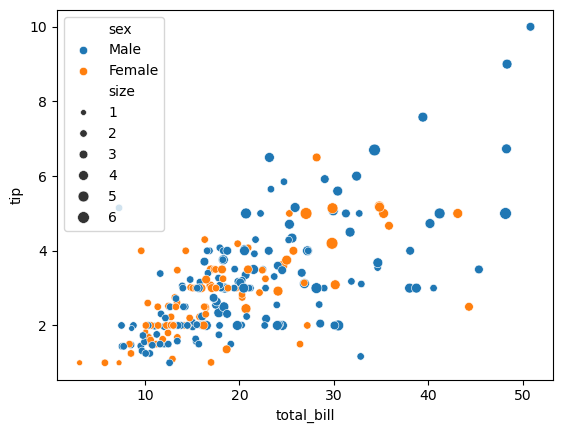

In [6]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

In [7]:
df = pd.read_csv(
  './data/global_internet_users.csv'
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

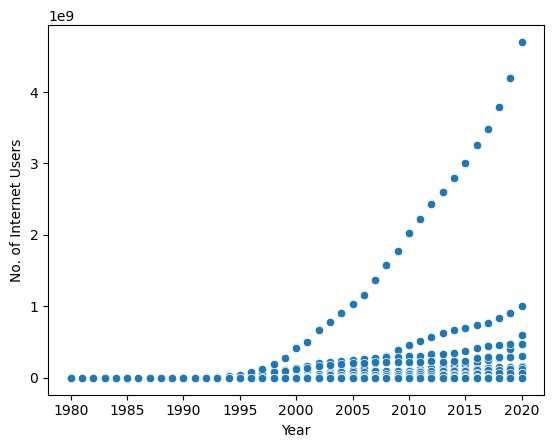

In [8]:
sns.scatterplot(x='Year', y='No. of Internet Users', data=df)

#연도별 사용자 - 국가/지역 별로 구분해서 시각화 

In [9]:
df.Entity.unique() ##국가

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe and Central Asia',
    

In [10]:
entities = ['China','India', 'Finland' ]
df_country = df.loc[df['Entity'].isin(entities)]
df_country[:5]

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
1579,1579,China,CHN,1980,0.0,0.0,0,0.0
1580,1580,China,CHN,1981,0.0,0.0,0,0.0
1581,1581,China,CHN,1982,0.0,0.0,0,0.0
1582,1582,China,CHN,1983,0.0,0.0,0,0.0
1583,1583,China,CHN,1984,0.0,0.0,0,0.0


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

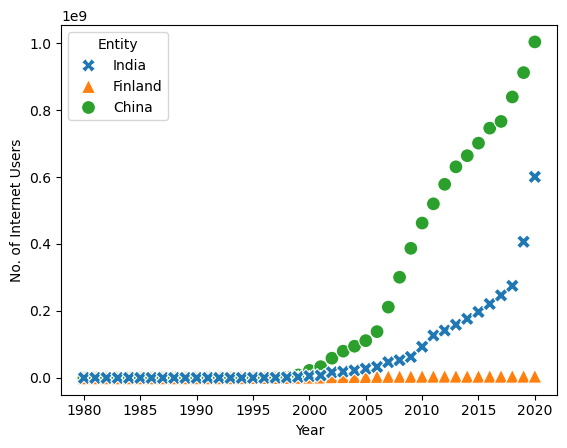

In [11]:
sns.scatterplot(x='Year', y='No. of Internet Users', data=df_country, 
                hue='Entity', hue_order=['India', 'Finland', 'China'], 
                markers=['o', '^', 'X'], s=100,
                style='Entity')

In [13]:
import plotly.express as px
fig = px.scatter(
  data_frame=df, x='Year', y='No. of Internet Users', width=600, height=600
)
fig.show()

In [17]:
color = px.colors.qualitative.Light24
px.scatter(data_frame=df_country, x='Year', y='No. of Internet Users', 
           width=400, height=400, color= 'Entity', color_discrete_sequence=color, symbol='Entity',
           size='No. of Internet Users'
           )

산점도는 데이터의 양에 따라 효과가 달라진다.
size 그룹간 차이 식별이 어려워질 수 있다.
최대2개 정도만 구분 - hue, style

# regplot


In [19]:
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
회귀선 + 산점도 => regplot

오차구간을 함께 볼 수 있다. ci 속성

<Axes: xlabel='total_bill', ylabel='tip'>

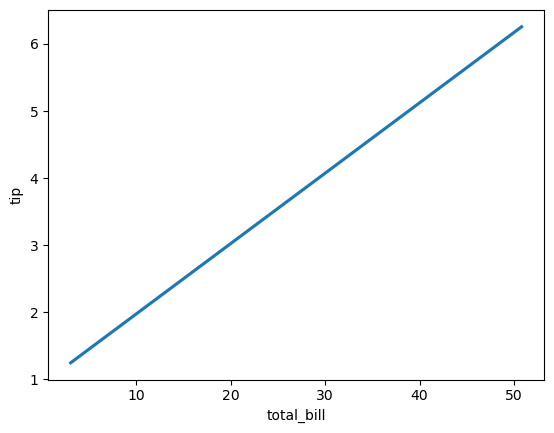

In [22]:
sns.regplot(x=tip_df['total_bill'], y=tip_df['tip'], scatter=False, ci=None)

In [ ]:
#size, tip 으로 regplot 그리기